In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b=((2*np.pi)/lambda_355)*(0.5e-2)**2
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range




pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 15e-3,       # [J] single pulse energy original
            'duration' : 7e-9,       # [s] single pulse length
            'PXe':300,
            'dk':0}    
harm_params = {'alpha' : 8.20839154e-48, #value from fit 'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}   #value from fit: 1.5e-35

zstart = -0.2
zstop =0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 10000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_WA = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_WA = {**pulse_params, **harm_params, **sol_params_WA}


In [3]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

In [4]:
bsamples = 10
brange = (f_to_b(0.5e-2,20e-2),f_to_b(0.5e-2,100e-2))# confocal perameter [m] (corresponds to f=20cm to f=100cm)
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

dk_samples = bsamples
dk_range = brange
dk =np.linspace(2/bs[-1],2/bs[1],dk_samples)
dk_scan = xr.DataArray(dk,
                     dims = 'dk',
                     attrs = {'units': 'm^-1',
                              'long_name': "Phase Mismatch"})

B_scan = scan_builder(single_func, params_WA, [bscan,dk_scan])

In [5]:
scanned_WA = B_scan(params=params_WA)

0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.00614732

In [6]:
# scanned_WA.coords

In [7]:
# data_selection = {'variable': '118 signal'}
# scanned_WA.sel(data_selection)


In [8]:
# scanned_WA.data[:,:,0]

In [9]:
# scanned_WA.data[0][:,0]

In [10]:
# scanned_WA.b.data

In [11]:
WA_Name='GBWA_b_vs_DeltaK_Single_Lens_samples=10x10_fstart=20cm_fstop=100cm_Pxe=300torr_energy=15mJ'
NA_Name='GBNA_b_vs_DeltaK_Single_Lens_samples=10x10_fstart=20cm_fstop=100cm_Pxe=300torr_energy=15mJ'


In [24]:
scanned_WA

<xarray.DataArray (dk: 10, b: 10, variable: 2)>
array([[[1.85049296e+25, 0.00000000e+00],
        [4.78039756e+26, 0.00000000e+00],
        [1.88069354e+27, 0.00000000e+00],
        [4.54213057e+27, 0.00000000e+00],
        [8.71763057e+27, 0.00000000e+00],
        [1.46299609e+28, 0.00000000e+00],
        [2.24805269e+28, 0.00000000e+00],
        [3.24550738e+28, 0.00000000e+00],
        [4.47280357e+28, 0.00000000e+00],
        [5.94629919e+28, 0.00000000e+00]],

       [[1.25840176e+25, 0.00000000e+00],
        [3.24768301e+26, 0.00000000e+00],
        [1.27644542e+27, 0.00000000e+00],
        [3.07996688e+27, 0.00000000e+00],
        [5.90595389e+27, 0.00000000e+00],
        [9.90236477e+27, 0.00000000e+00],
        [1.52021934e+28, 0.00000000e+00],
        [2.19274749e+28, 0.00000000e+00],
        [3.01917504e+28, 0.00000000e+00],
...
        [4.68180022e+22, 0.00000000e+00],
        [6.78416254e+21, 0.00000000e+00],
        [3.99387244e+22, 0.00000000e+00],
        [1.66821808e+23, 0.00000000e+00],
        [4.87019560e+23, 0.00000000e+00],
        [1.13913203e+24, 0.00000000e+00],
        [2.35108368e+24, 0.00000000e+00],
        [4.32353086e+24, 0.00000000e+00],
        [7.30128700e+24, 0.00000000e+00]],

       [[1.88365594e+22, 0.00000000e+00],
        [2.58468738e+24, 0.00000000e+00],
        [1.24945762e+25, 0.00000000e+00],
        [3.18043893e+25, 0.00000000e+00],
        [6.26420147e+25, 0.00000000e+00],
        [1.07851362e+26, 0.00000000e+00],
        [1.69996367e+26, 0.00000000e+00],
        [2.51786208e+26, 0.00000000e+00],
        [3.56291470e+26, 0.00000000e+00],
        [4.87294247e+26, 0.00000000e+00]]])
Coordinates:
  * dk        (dk) float64 221.2 364.3 507.3 ... 1.222e+03 1.365e+03 1.508e+03
  * b         (b) float64 0.0003616 0.001326 0.00229 ... 0.008076 0.00904
  * variable  (variable) <U19 '118 signal' 'Fluorescence signal'
Attributes: (12/19)
    energy:        0.015
    duration:      7e-09
    PXe:           300
    alpha:         8.20839154e-48
    chi3:          1.5e-35
    func:          curly_GBWA
    ...            ...
    rsamples:      10000
    dk:            221.23439935884656
    units:         Arb.
    zrange:        (-0.2, 0.2)
    init_vals:     [1e-10, 1e-10, 1e-10]
    t_eval:        [-0.2        -0.1995996  -0.1991992  -0.1987988  -0.198398...

In [25]:
np.save(WA_Name,".npy",scanned_WA.data)

In [13]:
# plt.scatter(scanned_WA.b.data,scanned_WA.data[0][:,0])
# plt.xlabel('Confocal Perameter [m]')
# plt.ylabel('118 Signal')
# plt.show()





In [14]:
# dk

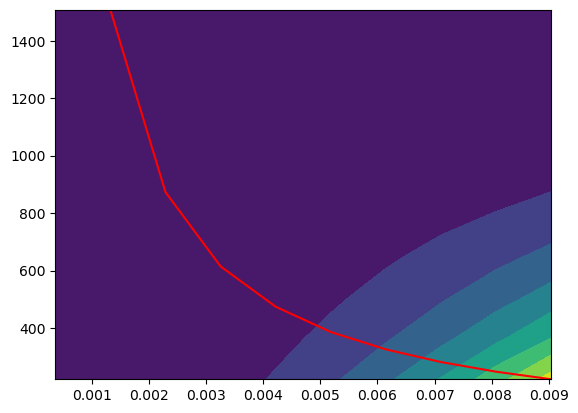

In [15]:
b_, dk_ = np.meshgrid(scanned_WA.b.data, scanned_WA.dk.data)
plt.contourf(b_,dk_,scanned_WA.data[:,:,0])
plt.plot(scanned_WA.b.data,2/scanned_WA.b.data,color='r')
plt.ylim(dk[0],dk[-1])
plt.savefig(WA_Name)

In [16]:
# opt_b_index = np.where(scanned_WA.data[:,0] == max(scanned_WA.data[:,0]))[0][0]
# print('optimal b value: ',scanned_WA.b.data[opt_b_index])


In [17]:


sol_params_NA = {'func': curly_GBNA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_NA = {**pulse_params, **harm_params, **sol_params_NA}

scan_NA = scan_builder(single_func, params_NA, [bscan,dk_scan])

In [18]:
scanned_NA = scan_NA(params=params_NA)

0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.006147323747725192
0.0071116109846443626
0.008075898221563533
0.009040185458482704
0.0003616003262101672
0.0013258875631293379
0.0022901748000485086
0.0032544620369676794
0.004218749273886851
0.005183036510806022
0.00614732

In [19]:

np.save(NA_Name,".npy",scanned_NA)

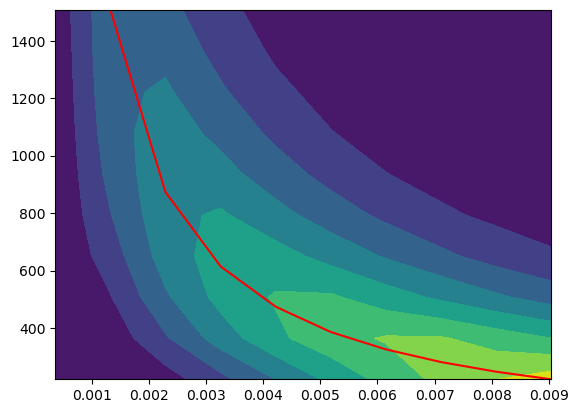

In [20]:
b_, dk_ = np.meshgrid(scanned_NA.b.data, scanned_NA.dk.data)
plt.contourf(b_,dk_,scanned_NA.data[:,:,0])
plt.plot(scanned_NA.b.data,2/scanned_NA.b.data,color='r')
plt.ylim(dk[0],dk[-1])
plt.savefig(NA_Name)

In [21]:
(30/(1-bs[0]))*( f_to_b(0.5e-2,100e-2)-f_to_b(0.5e-2,20e-2))

0.26045173339993555

In [22]:
10/( f_to_b(0.5e-2,100e-2)-f_to_b(0.5e-2,20e-2))

1152.2615550331582

In [23]:
1152.2615550331582*(1-bs[0])

1151.8448968789787